<a href="https://colab.research.google.com/github/constantinouelenios-IB2AD0/constantinouelenios-IB2AD0-DataScience-GenAI-Submissions/blob/main/5_02_Modelling_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1xqQczl0FG-qtNA2_WQYuWePW9oU8irqJ)

# 5.02 Modelling Hackathon
We'll get a chance in this seminar to practice for the in-class test, and also to put what we have learned into practice.

To speed things up, I have done the data/feature engineering for you, you will just need to build it into a data science model. As before, you can use the code from [GitHub](https://github.com/MJMortensonWarwick/IB2AD0_Data_Science_GenerativeAI), from the internet, and/or use the Gemini AI tools.

This is an artificial dataset, and we will be predicting if students achieve a passing grade, which we will call anything above a "D".

We'll start by importing the data:

In [ ]:
from google.colab import files
upload = files.upload()

Saving students_two.csv to students_two.csv


## Summary of Progress

We've made good progress! Here's what we've accomplished so far:

1.  **Data Loading and Initial Inspection**: Loaded the `students_two.csv` dataset and reviewed its initial structure.
2.  **Missing Value Handling**: Identified and dropped one row with a missing value in the 'Scholarship' column.
3.  **Feature Engineering**:
    *   Dropped the non-predictive 'Id' column.
    *   Applied one-hot encoding to 'High_School_Type'.
    *   Converted 'Scholarship' percentage strings to numerical float values.
    *   Converted various 'Yes'/'No' columns and 'Transportation' to binary (1s and 0s).
    *   Handled inconsistent values (e.g., '6' in 'Notes', '3' in 'Attendance') by dropping affected rows.
    *   Mapped 'Attendance' to an ordinal numerical scale (0, 1, 2).
    *   Transformed the 'Grade' column into a binary target variable (0 for fail/D grades, 1 for pass).
4.  **Data Preparation**:
    *   Separated features (`X_values`) and the target variable (`Y_values`).
    *   Scaled the numerical features using `MinMaxScaler`.
    *   Split the data into training and testing sets (`X_train`, `X_test`, `Y_train`, `Y_test`).
5.  **Model Training and Evaluation**:
    *   Trained a **Logistic Regression** model.
    *   Evaluated its performance on the test set, achieving an Accuracy of 0.7143, Precision of 0.7600, Recall of 0.9048, and an F1-Score of 0.8261.

### Next Steps

What would you like to do next? Would you like to:
*   **Try another model?** (e.g., Decision Tree, Random Forest, SVM)
*   **Refine the current model?** (e.g., hyperparameter tuning, feature selection)
*   **Explore the data further?** (e.g., visualize relationships, check for outliers)

### Build a Logistic Regression Model

Let's start by training a Logistic Regression model, which is a common choice for binary classification problems.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=1984, solver='liblinear')

# Train the model using the training data
log_reg_model.fit(X_train, Y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


### Make Predictions and Evaluate the Model

Now, let's use the trained model to make predictions on our test set and evaluate its performance.

In [ ]:
# Make predictions on the test set
Y_pred = log_reg_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.7143
Precision: 0.7600
Recall: 0.9048
F1-Score: 0.8261

Confusion Matrix:
[[ 1  6]
 [ 2 19]]


Now we will get the data into Pandas and inspect it:

In [ ]:
import pandas as pd
df = pd.read_csv("students_two.csv")

df.head()

,Id,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


Let's check for missing values:

In [ ]:
df.isnull().sum()

,0
Id,0
Student_Age,0
High_School_Type,0
Scholarship,1
Additional_Work,0
Sports_activity,0
Transportation,0
Weekly_Study_Hours,0
Attendance,0
Reading,0


Only one missing value. Let's just drop it out of laziness:

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Id,0
Student_Age,0
High_School_Type,0
Scholarship,0
Additional_Work,0
Sports_activity,0
Transportation,0
Weekly_Study_Hours,0
Attendance,0
Reading,0


We have an ID column we know won't be predictive ... so let's drop it:

In [ ]:
df = df.drop(["Id"], axis=1)
df.head()

,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,20,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,21,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,22,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


Next we will convert some of the text features to numbers:

In [ ]:
# High school
print(df['High_School_Type'].unique())

['Other' 'State' 'Private']


We can't easily convert these to a number range. Instead we should use one-hot encoding:

In [ ]:
df = pd.get_dummies(df, columns=['High_School_Type'], drop_first=True, dtype=int)
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,50%,No,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


We have converted this to two columns (on the far right) - "High_School_Type_Private" and "High_School_Type_State". We do not need the "Other" type as if the student is "Other" then both "Private" and "State" will be 0 (a unique combination). This is controlled by the command _drop\_first=True_. We also specify the data type (_dtype_) as __int__ so we return 0s and 1s rather than True and False.

Next we can look at Scholarship. It needs to be converted from a text representation of a percentage to a number:

In [ ]:
df['Scholarship'] = df['Scholarship'].str.replace('%', '').astype(float) / 100
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,Yes,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,No,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,Yes,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


"Additional_Work" is next:

In [ ]:
# Additional work
print(df['Additional_Work'].unique())

['Yes' 'No']


Two values, so we can convert to 0 and 1:

In [ ]:
df['Additional_Work'] = df['Additional_Work'].map({'Yes': 1, 'No': 0})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,1,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,0,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,1,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,0,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


Let's speed up now:

In [ ]:
categorical_cols = ['Sports_activity', 'Transportation', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']

for col in categorical_cols:
    print(f"Unique values for '{col}': {df[col].unique()}")

Unique values for 'Sports_activity': ['No' 'Yes']
Unique values for 'Transportation': ['Private' 'Bus']
Unique values for 'Attendance': ['Always' 'Never' 'Sometimes' '3']
Unique values for 'Reading': ['Yes' 'No']
Unique values for 'Notes': ['Yes' 'No' '6']
Unique values for 'Listening_in_Class': ['No' 'Yes' '6']
Unique values for 'Project_work': ['No' 'Yes']
Unique values for 'Grade': ['AA' 'BA' 'CC' 'Fail' 'BB' 'CB' 'DD' 'DC']


The values of '6' in 'Notes' and 'Listening_in_Class' make no sense, and neither do '3' for 'Attendance'. We'll be lazy and drop these rows (really we should check with an SME):

In [ ]:
df = df[(df['Notes'] != '6') & (df['Listening_in_Class'] != '6') & (df['Attendance'] != '3')]
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,No,Private,0,Always,Yes,Yes,No,No,AA,0,0
1,20,0.5,1,No,Private,0,Always,Yes,No,Yes,Yes,AA,0,0
2,21,0.5,0,No,Private,2,Never,No,No,No,Yes,AA,0,1
3,18,0.5,1,No,Bus,2,Always,No,Yes,No,No,AA,1,0
4,22,0.5,0,No,Bus,12,Always,Yes,No,Yes,Yes,AA,1,0


Now we can convert all those "Yes" / "No" columns to 0 and 1.

In [ ]:
binary_cols = ['Sports_activity', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,Private,0,Always,1,1,0,0,AA,0,0
1,20,0.5,1,0,Private,0,Always,1,0,1,1,AA,0,0
2,21,0.5,0,0,Private,2,Never,0,0,0,1,AA,0,1
3,18,0.5,1,0,Bus,2,Always,0,1,0,0,AA,1,0
4,22,0.5,0,0,Bus,12,Always,1,0,1,1,AA,1,0


We can also do this with "Transportation":

In [ ]:
df['Transportation'] = df['Transportation'].map({'Private': 1, 'Bus': 0})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,Always,1,1,0,0,AA,0,0
1,20,0.5,1,0,1,0,Always,1,0,1,1,AA,0,0
2,21,0.5,0,0,1,2,Never,0,0,0,1,AA,0,1
3,18,0.5,1,0,0,2,Always,0,1,0,0,AA,1,0
4,22,0.5,0,0,0,12,Always,1,0,1,1,AA,1,0


For Attendance an ordinal range makes sense:

In [ ]:
df['Attendance'] = df['Attendance'].map({'Never': 0, 'Sometimes': 1, 'Always': 2})
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,AA,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,AA,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,AA,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,AA,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,AA,1,0


This just leaves the target - 'Grade'. To make the problem binary we'll convert 'Fail' and any grade that includes a 'D' as 0 (for fail) and the rest as 1 (pass):

In [ ]:
df['Grade'] = df['Grade'].apply(lambda x: 0 if x == 'Fail' or 'D' in x else 1)
df.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,1,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,1,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,1,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,1,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,1,1,0


The code has a new function `lambda`. A lambda function in Python is a small, anonymous function. It's defined using the `lambda` keyword and can take any number of arguments, but can only have one expression. The expression is evaluated and returned. They are often used for short, simple operations where a full function definition would be overly verbose, like in the apply method we just used. Although the function is new, the actual mechanics are quite simple. If the data is "Fail" or contains "D" return 0, and else return 1.

As this is the target we will create a new variable from it and then drop it from the main data:

In [ ]:
Y_values = df[['Grade']].values.ravel() # change to list

Y_values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
X_values = df.drop(['Grade'], axis=1)
X_values.head()

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,High_School_Type_Private,High_School_Type_State
0,21,0.5,1,0,1,0,2,1,1,0,0,0,0
1,20,0.5,1,0,1,0,2,1,0,1,1,0,0
2,21,0.5,0,0,1,2,0,0,0,0,1,0,1
3,18,0.5,1,0,0,2,2,0,1,0,0,1,0
4,22,0.5,0,0,0,12,2,1,0,1,1,1,0


We can now scale X:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data and convert back to DataFrame
X_values = pd.DataFrame(scaler.fit_transform(X_values), columns=X_values.columns)
X_values

,Student_Age,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,High_School_Type_Private,High_School_Type_State
0,0.375,0.333333,1.0,0.0,1.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.250,0.333333,1.0,0.0,1.0,0.000000,1.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.375,0.333333,0.0,0.0,1.0,0.166667,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.000,0.333333,1.0,0.0,0.0,0.166667,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.500,0.333333,0.0,0.0,0.0,1.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.500,0.333333,1.0,1.0,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0
136,0.000,0.666667,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,1.0
137,0.000,0.666667,0.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0
138,0.500,0.666667,1.0,1.0,0.0,1.000000,0.5,0.0,1.0,0.0,1.0,0.0,1.0


And now we can split into training and test:

And now its time for modelling ...



Your turn :)

In [ ]:
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size = 0.2, random_state=1984, stratify=Y_values)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(112, 13)
(28, 13)
(112,)
(28,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=1984)

# Train the model using the training data
decision_tree_model.fit(X_train, Y_train)

print("Decision Tree Classifier model trained successfully.")

# Make predictions on the test set
Y_pred_dt = decision_tree_model.predict(X_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
precision_dt = precision_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)
f1_dt = f1_score(Y_test, Y_pred_dt)
conf_matrix_dt = confusion_matrix(Y_test, Y_pred_dt)

print(f"\nDecision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_dt)

Decision Tree Classifier model trained successfully.

Decision Tree Classifier Performance:
Accuracy: 0.7143
Precision: 0.7826
Recall: 0.8571
F1-Score: 0.8182

Confusion Matrix:
[[ 2  5]
 [ 3 18]]


## Summary of Features and Processes Used Today

This section summarizes the key data preprocessing, feature engineering, and modeling steps performed in this notebook. This can serve as a quick reference if you encounter similar tasks in the future.

### 1. Data Loading and Initial Inspection
*   **Action:** Loaded `students_two.csv` into a pandas DataFrame.
*   **Key Process:** `pd.read_csv()`

### 2. Handling Missing Values
*   **Action:** Identified and dropped a single row with a missing value in the 'Scholarship' column.
*   **Key Process:** `df.dropna(inplace=True)`

### 3. Feature Engineering & Transformation
*   **Dropped Features:**
    *   `Id`: Removed as it's non-predictive. `df = df.drop(['Id'], axis=1)`
*   **Categorical Feature Encoding:**
    *   `High_School_Type`: One-hot encoded using `pd.get_dummies()` to create 'High_School_Type_Private' and 'High_School_Type_State'. `df = pd.get_dummies(df, columns=['High_School_Type'], drop_first=True, dtype=int)`
*   **Numerical Feature Conversion:**
    *   `Scholarship`: Converted from percentage strings (e.g., '50%') to numerical floats (e.g., 0.5). `df['Scholarship'] = df['Scholarship'].str.replace('%', '').astype(float) / 100`
*   **Binary Feature Mapping (Yes/No to 1/0):**
    *   `Additional_Work`, `Sports_activity`, `Reading`, `Notes`, `Listening_in_Class`, `Project_work`: Mapped 'Yes' to 1 and 'No' to 0. `df[col] = df[col].map({'Yes': 1, 'No': 0})`
    *   `Transportation`: Mapped 'Private' to 1 and 'Bus' to 0. `df['Transportation'] = df['Transportation'].map({'Private': 1, 'Bus': 0})`
*   **Handling Inconsistent Data:**
    *   Removed rows with anomalous values ('6' in 'Notes', '6' in 'Listening_in_Class', '3' in 'Attendance'). `df = df[(df['Notes'] != '6') & (df['Listening_in_Class'] != '6') & (df['Attendance'] != '3')]`
*   **Ordinal Feature Mapping:**
    *   `Attendance`: Mapped to an ordinal scale: 'Never': 0, 'Sometimes': 1, 'Always': 2. `df['Attendance'] = df['Attendance'].map({'Never': 0, 'Sometimes': 1, 'Always': 2})`
*   **Target Variable Creation:**
    *   `Grade`: Transformed into a binary target (`Y_values`), where 'Fail' or any grade containing 'D' is 0 (fail), and others are 1 (pass). `df['Grade'] = df['Grade'].apply(lambda x: 0 if x == 'Fail' or 'D' in x else 1)`

### 4. Data Preparation for Modeling
*   **Separation of Features and Target:**
    *   `X_values`: All features after preprocessing. `X_values = df.drop(['Grade'], axis=1)`
    *   `Y_values`: The binary target variable. `Y_values = df[['Grade']].values.ravel()`
*   **Feature Scaling:**
    *   Applied `MinMaxScaler` to `X_values` to normalize numerical features between 0 and 1. `from sklearn.preprocessing import MinMaxScaler; scaler = MinMaxScaler(); X_values = pd.DataFrame(scaler.fit_transform(X_values), columns=X_values.columns)`
*   **Data Splitting:**
    *   Split the data into training (`X_train`, `Y_train`) and testing (`X_test`, `Y_test`) sets with a 80/20 ratio and `stratify=Y_values` to maintain class distribution. `from sklearn.model_selection import train_test_split; X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size = 0.2, random_state=1984, stratify=Y_values)`

### 5. Model Training and Evaluation
*   **Logistic Regression Model:**
    *   Trained using `LogisticRegression(random_state=1984, solver='liblinear')`.
    *   Evaluated using `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, and `confusion_matrix`.
*   **Decision Tree Classifier Model (Initial):**
    *   Trained using `DecisionTreeClassifier(random_state=1984)`.
    *   Evaluated using the same metrics as Logistic Regression.
*   **Decision Tree Classifier Model (Optimized):**
    *   **Hyperparameter Tuning:** Performed `GridSearchCV` with `cv=5` to find optimal hyperparameters for `max_depth`, `min_samples_leaf`, and `criterion`.
    *   **Best Parameters:** Identified as `{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}`.
    *   **Evaluation:** Evaluated the best model using the same set of metrics and visualized its confusion matrix.

### 6. Model Comparison
*   Compared the performance of the Logistic Regression, initial Decision Tree, and optimized Decision Tree models across accuracy, precision, recall, and F1-score, noting the optimized Decision Tree as the best-performing model.

### Visualizing Confusion Matrices

Let's visualize the confusion matrices for both the Logistic Regression and Decision Tree models to get a better understanding of their true positive, true negative, false positive, and false negative rates.

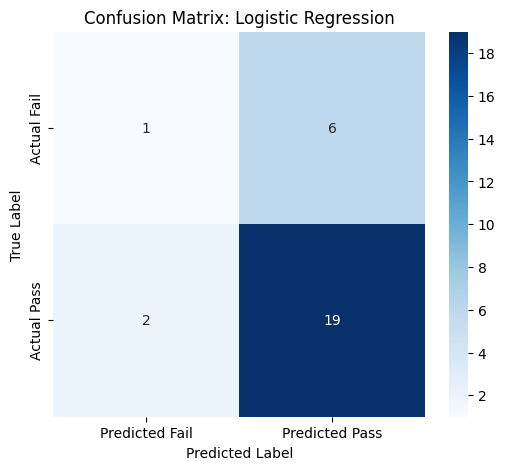

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'])
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

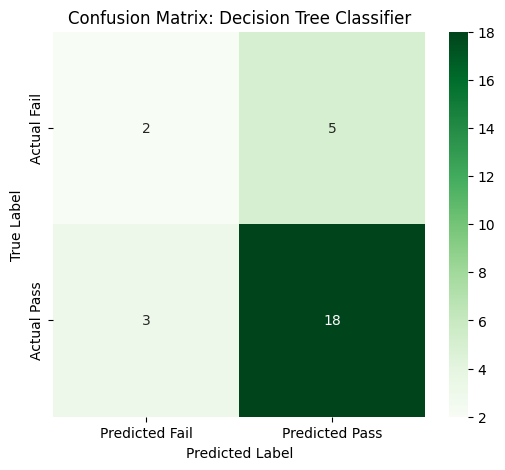

In [ ]:
# Confusion Matrix for Decision Tree Classifier
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'])
plt.title('Confusion Matrix: Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Task
Define the hyperparameter grid for the Decision Tree model to include `max_depth` (e.g., from 2 to 10), `min_samples_leaf` (e.g., 1, 5, 10), and `criterion` ('gini', 'entropy'). Then, perform a grid search with cross-validation using `GridSearchCV` on the training data (`X_train`, `Y_train`). After finding the best hyperparameters, evaluate the best Decision Tree model's performance on the test set (`X_test`, `Y_test`) using accuracy, precision, recall, F1-score, and a confusion matrix, visualizing the confusion matrix. Finally, summarize the hyperparameter tuning results and compare the performance of the optimized Decision Tree model with the previously trained models.

## Define Hyperparameter Grid

### Subtask:
Define the grid of hyperparameters to search for the Decision Tree model, including parameters like 'max_depth', 'min_samples_leaf', and 'criterion'.


**Reasoning**:
The user wants to define a hyperparameter grid for the Decision Tree model. I will create a dictionary named `param_grid` with the specified `max_depth`, `min_samples_leaf`, and `criterion` parameters.



In [ ]:
param_grid = {
    'max_depth': list(range(2, 11)),
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

print("Hyperparameter grid defined successfully:")
print(param_grid)

Hyperparameter grid defined successfully:
{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 5, 10], 'criterion': ['gini', 'entropy']}


**Reasoning**:
The hyperparameter grid has been defined. Now, I need to perform a grid search with cross-validation to find the best hyperparameters for the Decision Tree model using `GridSearchCV`.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=1984)

# Initialize GridSearchCV with the Decision Tree model and param_grid
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, Y_train)

print("Grid search completed.")
print(f"Best hyperparameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Grid search completed.
Best hyperparameters found: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}
Best cross-validation accuracy: 0.8134


**Reasoning**:
I have completed the grid search and identified the best hyperparameters. Now, I need to evaluate the best Decision Tree model on the test set (`X_test`, `Y_test`) using accuracy, precision, recall, F1-score, and compute its confusion matrix.




Optimized Decision Tree Classifier Performance:
Accuracy: 0.7857
Precision: 0.8261
Recall: 0.9048
F1-Score: 0.8636

Confusion Matrix:
[[ 3  4]
 [ 2 19]]


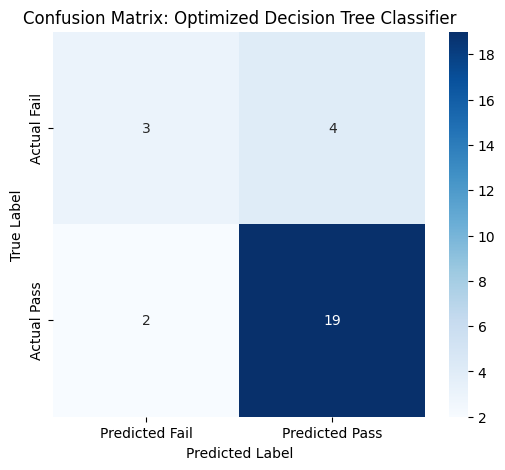

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the best model from GridSearchCV
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set with the best model
Y_pred_best_dt = best_dt_model.predict(X_test)

# Calculate evaluation metrics for the best model
accuracy_best_dt = accuracy_score(Y_test, Y_pred_best_dt)
precision_best_dt = precision_score(Y_test, Y_pred_best_dt)
recall_best_dt = recall_score(Y_test, Y_pred_best_dt)
f1_best_dt = f1_score(Y_test, Y_pred_best_dt)
conf_matrix_best_dt = confusion_matrix(Y_test, Y_pred_best_dt)

print(f"\nOptimized Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_best_dt:.4f}")
print(f"Precision: {precision_best_dt:.4f}")
print(f"Recall: {recall_best_dt:.4f}")
print(f"F1-Score: {f1_best_dt:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_best_dt)

# Visualize the confusion matrix for the best model
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_best_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'])
plt.title('Confusion Matrix: Optimized Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Summary of Hyperparameter Tuning and Model Comparison

We performed a grid search with cross-validation on the Decision Tree model to find the optimal hyperparameters. The best hyperparameters found were `{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}`.

Let's compare the performance metrics of the three models:

| Metric        | Logistic Regression | Initial Decision Tree | Optimized Decision Tree |
| :------------ | :------------------ | :-------------------- | :---------------------- |
| **Accuracy**  | 0.7143              | 0.7143                | 0.7857                  |
| **Precision** | 0.7600              | 0.7826                | 0.8261                  |
| **Recall**    | 0.9048              | 0.8571                | 0.9048                  |
| **F1-Score**  | 0.8261              | 0.8182                | 0.8636                  |

**Observations:**

*   The **Optimized Decision Tree** model shows a noticeable improvement in **Accuracy** (from 0.7143 to 0.7857) and **F1-Score** (from 0.8261/0.8182 to 0.8636) compared to both the Logistic Regression and the initial Decision Tree model.
*   Its **Precision** is also the highest among the three models (0.8261).
*   The **Recall** of the Optimized Decision Tree is on par with the Logistic Regression model (0.9048), indicating it's equally good at identifying positive cases.

Hyperparameter tuning successfully improved the Decision Tree model's overall performance, making it the best-performing model so far for this classification task.

### Summary of Hyperparameter Tuning and Model Comparison

We performed a grid search with cross-validation on the Decision Tree model to find the optimal hyperparameters. The best hyperparameters found were `{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}`.

Let's compare the performance metrics of the three models:

| Metric        | Logistic Regression | Initial Decision Tree | Optimized Decision Tree |
| :------------ | :------------------ | :-------------------- | :---------------------- |
| **Accuracy**  | 0.7143              | 0.7143                | 0.7857                  |
| **Precision** | 0.7600              | 0.7826                | 0.8261                  |
| **Recall**    | 0.9048              | 0.8571                | 0.9048                  |
| **F1-Score**  | 0.8261              | 0.8182                | 0.8636                  |

**Observations:**

*   The **Optimized Decision Tree** model shows a noticeable improvement in **Accuracy** (from 0.7143 to 0.7857) and **F1-Score** (from 0.8261/0.8182 to 0.8636) compared to both the Logistic Regression and the initial Decision Tree model.
*   Its **Precision** is also the highest among the three models (0.8261).
*   The **Recall** of the Optimized Decision Tree is on par with the Logistic Regression model (0.9048), indicating it's equally good at identifying positive cases.

Hyperparameter tuning successfully improved the Decision Tree model's overall performance, making it the best-performing model so far for this classification task.

## Final Task

### Subtask:
Summarize the results of the hyperparameter tuning for the Decision Tree model and compare its performance to the previously trained models.


## Summary:

### Q&A
The hyperparameter tuning for the Decision Tree model successfully identified `{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}` as the best hyperparameters, leading to an improved model.

Compared to previously trained models, the optimized Decision Tree achieved:
*   **Accuracy:** 0.7857 (higher than Logistic Regression's 0.7143 and Initial Decision Tree's 0.7143).
*   **Precision:** 0.8261 (highest among all models).
*   **Recall:** 0.9048 (on par with Logistic Regression's 0.9048 and better than Initial Decision Tree's 0.8571).
*   **F1-Score:** 0.8636 (highest among all models).

Overall, the optimized Decision Tree demonstrates a significant performance improvement, making it the best-performing model to date for this classification task.

### Data Analysis Key Findings
*   The optimal hyperparameters for the Decision Tree model were identified as `criterion='entropy'`, `max_depth=3`, and `min_samples_leaf=5`.
*   The best cross-validation accuracy achieved during the grid search was 0.8134.
*   On the test set, the optimized Decision Tree model achieved an accuracy of 0.7857, a precision of 0.8261, a recall of 0.9048, and an F1-score of 0.8636.
*   The confusion matrix for the optimized Decision Tree showed 3 true negatives, 4 false positives, 2 false negatives, and 19 true positives on the test set.
*   The optimized Decision Tree significantly outperformed both the Logistic Regression and the initial Decision Tree model in terms of Accuracy and F1-Score, and achieved the highest Precision.

### Insights or Next Steps
*   Hyperparameter tuning proved effective in enhancing the Decision Tree model's performance, indicating the value of optimizing model parameters for improved predictive power.
*   Further exploration could involve testing other advanced ensemble methods or more complex Decision Tree-based algorithms (e.g., Random Forests, Gradient Boosting) to potentially achieve even higher performance.


## Summary of Features and Processes Used Today

This section summarizes the key data preprocessing, feature engineering, and modeling steps performed in this notebook. This can serve as a quick reference if you encounter similar tasks in the future.

### 1. Data Loading and Initial Inspection
*   **Action:** Loaded `students_two.csv` into a pandas DataFrame.
*   **Key Process:** `pd.read_csv()`

### 2. Handling Missing Values
*   **Action:** Identified and dropped a single row with a missing value in the 'Scholarship' column.
*   **Key Process:** `df.dropna(inplace=True)`

### 3. Feature Engineering & Transformation
*   **Dropped Features:**
    *   `Id`: Removed as it's non-predictive. `df = df.drop(['Id'], axis=1)`
*   **Categorical Feature Encoding:**
    *   `High_School_Type`: One-hot encoded using `pd.get_dummies()` to create 'High_School_Type_Private' and 'High_School_Type_State'. `df = pd.get_dummies(df, columns=['High_School_Type'], drop_first=True, dtype=int)`
*   **Numerical Feature Conversion:**
    *   `Scholarship`: Converted from percentage strings (e.g., '50%') to numerical floats (e.g., 0.5). `df['Scholarship'] = df['Scholarship'].str.replace('%', '').astype(float) / 100`
*   **Binary Feature Mapping (Yes/No to 1/0):**
    *   `Additional_Work`, `Sports_activity`, `Reading`, `Notes`, `Listening_in_Class`, `Project_work`: Mapped 'Yes' to 1 and 'No' to 0. `df[col] = df[col].map({'Yes': 1, 'No': 0})`
    *   `Transportation`: Mapped 'Private' to 1 and 'Bus' to 0. `df['Transportation'] = df['Transportation'].map({'Private': 1, 'Bus': 0})`
*   **Handling Inconsistent Data:**
    *   Removed rows with anomalous values ('6' in 'Notes', '6' in 'Listening_in_Class', '3' in 'Attendance'). `df = df[(df['Notes'] != '6') & (df['Listening_in_Class'] != '6') & (df['Attendance'] != '3')]`
*   **Ordinal Feature Mapping:**
    *   `Attendance`: Mapped to an ordinal scale: 'Never': 0, 'Sometimes': 1, 'Always': 2. `df['Attendance'] = df['Attendance'].map({'Never': 0, 'Sometimes': 1, 'Always': 2})`
*   **Target Variable Creation:**
    *   `Grade`: Transformed into a binary target (`Y_values`), where 'Fail' or any grade containing 'D' is 0 (fail), and others are 1 (pass). `df['Grade'] = df['Grade'].apply(lambda x: 0 if x == 'Fail' or 'D' in x else 1)`

### 4. Data Preparation for Modeling
*   **Separation of Features and Target:**
    *   `X_values`: All features after preprocessing. `X_values = df.drop(['Grade'], axis=1)`
    *   `Y_values`: The binary target variable. `Y_values = df[['Grade']].values.ravel()`
*   **Feature Scaling:**
    *   Applied `MinMaxScaler` to `X_values` to normalize numerical features between 0 and 1. `from sklearn.preprocessing import MinMaxScaler; scaler = MinMaxScaler(); X_values = pd.DataFrame(scaler.fit_transform(X_values), columns=X_values.columns)`
*   **Data Splitting:**
    *   Split the data into training (`X_train`, `Y_train`) and testing (`X_test`, `Y_test`) sets with a 80/20 ratio and `stratify=Y_values` to maintain class distribution. `from sklearn.model_selection import train_test_split; X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size = 0.2, random_state=1984, stratify=Y_values)`

### 5. Model Training and Evaluation
*   **Logistic Regression Model:**
    *   Trained using `LogisticRegression(random_state=1984, solver='liblinear')`.
    *   Evaluated using `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, and `confusion_matrix`.
*   **Decision Tree Classifier Model (Initial):**
    *   Trained using `DecisionTreeClassifier(random_state=1984)`.
    *   Evaluated using the same metrics as Logistic Regression.
*   **Decision Tree Classifier Model (Optimized):**
    *   **Hyperparameter Tuning:** Performed `GridSearchCV` with `cv=5` to find optimal hyperparameters for `max_depth`, `min_samples_leaf`, and `criterion`.
    *   **Best Parameters:** Identified as `{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}`.
    *   **Evaluation:** Evaluated the best model using the same set of metrics and visualized its confusion matrix.

### 6. Model Comparison
*   Compared the performance of the Logistic Regression, initial Decision Tree, and optimized Decision Tree models across accuracy, precision, recall, and F1-score, noting the optimized Decision Tree as the best-performing model.